In [2]:
!pip install dtw-python

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from dtw import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



Dynamic Time Warping (DTW) is a method used to match two series by modyfing time (slowing down or speeding up selected parts of a series)

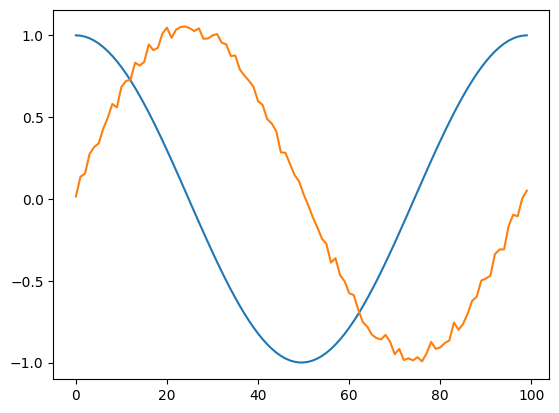

In [4]:
idx = np.linspace(0,6.28,num=100)
series_sin = np.sin(idx) + np.random.uniform(size=100)/10.0
series_cos = np.cos(idx)
plt.plot(series_cos)
plt.plot(series_sin)



<Axes: >

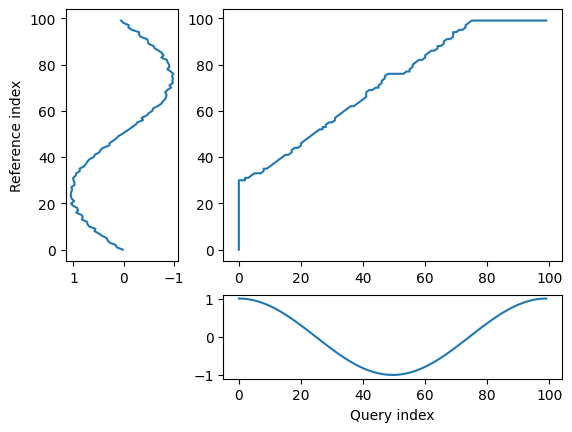

In [5]:
alignment = dtw(series_cos, series_sin, keep_internals=True)
alignment.plot(type="threeway")

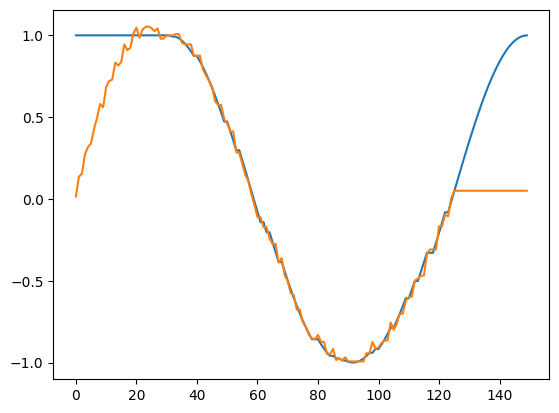

In [6]:
plt.plot(series_cos[alignment.index1])
plt.plot(series_sin[alignment.index2])

A similar concept but for text is used in the edit distance or the levenshtein distance method where two strings are being matched by either inserting, deleting, or replacing a character. If you are not familiar with the algorithm you can read https://medium.com/@ethannam/understanding-the-levenshtein-distance-equation-for-beginners-c4285a5604f0

In [7]:
def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

# Example usage:
word1 = "kitten"
word2 = "sitting"
distance = levenshtein_distance(word1, word2)
print(f"The edit distance between '{word1}' and '{word2}' is: {distance}")

word3 = "flaw"
word4 = "lawn"
distance2 = levenshtein_distance(word3, word4)
print(f"The edit distance between '{word3}' and '{word4}' is: {distance2}")

The edit distance between 'kitten' and 'sitting' is: 3
The edit distance between 'flaw' and 'lawn' is: 2


There are packages with the method implemented but as your task will be to extend this algorithm it might be easier to use a simple implementation

## Task
Create a search engine that based on a query will return closest matching texts (you can use titles of wikipedia articles you have downloaded). Can you extend the edit distance method to:
  

*   penalize less errors if two letters are close to each other on a keyboard e.g. m-n
*   prioritize matching from the begining of a word. If a query is "to" then "Tomahawk" is a better match than "Potato" since we assume that's in line with users' behaviour

Propose and implement two additional extensions, show on some examples how does your approach work. As always 144h from end of this class to send the project

In [ ]:
keyboard_pos = {}
keyboard = ["qwertyuiop", 
            "asdfghjkl ", 
            "zxcvbnm   "]
for r, row in enumerate(keyboard):
    for c, ch in enumerate(row):
        keyboard_pos[ch] = (r, c)

neighbours = {(0,1), (0,-1), (1,0), (-1,0), (-1,1), (1,-1)}

def is_neighbouring(a, b):
    if a == b:
        return 0
    if a not in keyboard_pos or b not in keyboard_pos:
        return 1
    ra, ca = keyboard_pos[a]
    rb, cb = keyboard_pos[b]
    if (rb - ra, cb - ca) in neighbours:
        return 0.3
    return 1
        


In [28]:
documents = ['Machine Learning',
 'Five Advanced Plots in Python - Matplotlib',
 'How to Make your Computer Talk with Python',
 'Anomaly Detection on Servo Drives',
 'Key takeaways from Kaggle’s most recent time series competition - Ventilator Pressure Prediction',
 'Animated Mathematical Analysis',
 'How to Perform Speech Recognition with Python',
 'Beyond The Semesters: E04',
 'How to improve classification of e-commerce pages, incorporating multiple modalities',
 'Time Series Forecasting with ThymeBoost',
 'CHAPTER 2: Why I Chose Data Science!',
 'Training Provably-Robust Neural Networks',
 'Time Series Forecasting with ThymeBoost',
 'How to improve classification of e-commerce pages, incorporating multiple modalities',
 '5 Cute Features of CatBoost',
 'Variance Inflation Factor (VIF) and it’s relationship with multicollinearity&nbsp;.',
 'Beyond The Semesters: E04',
 'Efficient Digital Transformation - Particle Swarm Optimiser',
 'MEASURE OF ASYMMETRY',
 'What is linear regression? A quick cover with a tutorial',
 'Correlation VS Covariance: The easy way',
 'Are Recommender System harming us?',
 '1 Line of Python Code That Will Speed Up Your AI by Up to 6x',
 'If You Are Serious About Data Science Job. You Must Know These 3 Things.',
 'Recommender System With Machine Learning and Statistics',
 'Bias detection and mitigation in IBM AutoAI',
 'Data Engineering: Create your own Dataset',
 'Graph Neural Networks and Generalizable Models in Neuroscience',
 'Fastest Way of Deploying Your Machine Learning Models',
 'A Novel Approach to Integrate Speech Recognition into Authentication Systems',
 '3 Lessons Learned in Teaching Machine Learning for Earth Observation Techniques',
 'Vision Transformer in Galaxy Morphology Classification',
 'Exploring Methods of Deep Reinforcement Learning with NLP Applications',
 '6 Essential Tips to Solve Data Science Projects',
 'Data Science Interview Questions My Friends and I got asked recently (III)',
 'Understanding Uber’s Generative Teaching Networks',
 'How to achieve efficient large-batch training?',
 'How Parallelization and Large Batch Size Improve the Performance of Deep Neural Networks.',
 'Why You Need to Know the Inner Workings of Models',
 'Let’s Build A Simple Object Classification Task I']

In [167]:
def beginning_boosting(s1,s2):
    multiplier = 1.1
    sum = 1
    for i,chr in enumerate(s1):
        if i>=len(s2) or is_neighbouring(chr,s2[i])==1:
            return sum-1
        sum*= multiplier
    return sum-1

def levenshtein_distance_weighted(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance_weighted(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + is_neighbouring(c1, c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

def query_distance(query, document):
    q_words = query.lower().split()
    d_words = document.lower().split()
    dist_combined = 0
    for q_word in q_words:
        min_dist = float('inf')
        for d_word in d_words:
            base_distance = levenshtein_distance_weighted(q_word, d_word)
            boost = beginning_boosting(q_word, d_word)
            dist = max(base_distance - boost, 0)
            if dist < min_dist:
                min_dist = dist
        dist_combined += min_dist
    return dist_combined

def search_in_documents(q, docs):
    hits = []
    for d in docs:
        dist = query_distance(q, d)
        hits.append((d, dist))
    print("Query:", q)
    for i in sorted(hits, key=lambda x: x[1])[:3]:
        print(i)
    return sorted(hits, key=lambda x: x[1])

_ = search_in_documents("hle", documents)

_ = search_in_documents("ways", documents)

_ = search_in_documents("yij afd", documents)

_ = search_in_documents("ti seridf", documents)


Query: hle
('How to Make your Computer Talk with Python', 0.2689999999999996)
('How to Perform Speech Recognition with Python', 0.2689999999999996)
('How to improve classification of e-commerce pages, incorporating multiple modalities', 0.2689999999999996)
Query: ways
('Correlation VS Covariance: The easy way', 0.6689999999999996)
('Fastest Way of Deploying Your Machine Learning Models', 0.6689999999999996)
('CHAPTER 2: Why I Chose Data Science!', 1.6)
Query: yij afd
('If You Are Serious About Data Science Job. You Must Know These 3 Things.', 0.5379999999999991)
('Bias detection and mitigation in IBM AutoAI', 2.2)
('Graph Neural Networks and Generalizable Models in Neuroscience', 2.2)
Query: ti seridf
('Key takeaways from Kaggle’s most recent time series competition - Ventilator Pressure Prediction', 2.4794899999999993)
('Time Series Forecasting with ThymeBoost', 2.4794899999999993)
('Time Series Forecasting with ThymeBoost', 2.4794899999999993)
